# Máquinas de Soporte Vectorial

Boletín 5: Máquinas de Soporte Vectoria
Para la realización de las prácticas de esta tercera parte de la materia se utilizará scikit-learn, una
librería de aprendizaje estadístico en Python, a través de Jupyter Notebooks. La ejecución se realizará
en el CESGA siguiendo los pasos indicados en el archivo CESGA.pdf.


### Instrucciones para la experimentación en TODOS los boletines de prácticas

En los diferentes ejercicios que se realizarán durante el curso, existen una serie de operaciones con una componente aleatoria: la división en entrenamiento y test, el aprendizaje de un modelo o incluso, en
algunos casos, el test del modelo. Como norma general de experimentación es interesante asegurar la repetibilidad de los experimentos, eliminando la aleatoriedad, puesto que nos permite depurar errores,
comparar modelos, etc. Además, para la evaluación de los boletines también es imprescindible eliminar esa aleatoriedad.

Para ello vamos a fijar la semilla del generador de números aleatorios, de tal manera que su secuencia sea siempre la misma. La semilla se establece mediante el comando np.random.seed(SEED_VALUE), y
en este boletín utilizaremos un SEED_VALUE=1. Será necesario utilizar este comando inmediatamente antes de cualquier operación con un componente aleatorio. Esto incluye: train_test_split(), fit(),
predict(), etc. En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento random_state=SEED_VALUE.

In [1]:
!python --version

Python 2.7.15 :: Anaconda, Inc.


In [2]:
!python3 --version

/usr/bin/sh: python3: command not found


## Importamos las librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import matplotlib

import os
import itertools
#import joblib  # Para guardar el modelo

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')
#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # Para evitar warnings en algunas gráficas
import warnings

# Filtrar y ocultar todos los warnings
warnings.filterwarnings('ignore')

## Definimos variables globales

In [6]:
DATASET_NAME = './data/Exercice.data'
DATASET_DELIMITER = ','
SEED_VALUE = 1  # NO CAMBIES ESTA SEMILLA, así todos tendremos los mismos resultados

# Ejercicio 1

Dado el siguiente conjunto de datos de clasificación con 16 observaciones, 2 variables de entrada y
una variable de salida, mediante una SVM lineal con C=1 se han obtenido los coeficientes αi
indicados en la última columna:

Aprendizaje Estadístico
Máster en Big Data. Universidad de Santiago de Compostela
Boletín 5: Máquinas de Soporte Vectorial
Para la realización de las prácticas correspondientes a este boletín se utilizará scikit-learn en el CESGA.
Utilizaremos un SEED_VALUE=1.
1. Dado el siguiente conjunto de datos de clasificación con 16 observaciones, 2 variables de entrada y
una variable de salida, mediante una SVM lineal con C=1 se han obtenido los coeficientes αi
indicados en la última columna:

Indica:
- Cuáles son los vectores de soporte y cuáles de ellos están en el límite del margen.
- Cuáles son los coeficientes del hiperplano (β y β0) y el valor de M.
- Los valores de εi y las observaciones incorrectamente clasificadas.
Nota: este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn.n valor de λ=1, y una tasa de aprendizaje α=0,5.

**Nota:** este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn. Para realizar los
cálculos (multiplicación de matrices, etc.) se recomienda utilizar Python.

## Análisis de SVM Lineal con C=1

Se realiza un análisis de una Máquina de Soporte Vectorial (SVM) lineal utilizando un conjunto de datos de clasificación con 16 observaciones, cada una con 2 variables de entrada y una variable de salida. Los coeficientes \( \alpha_i \) obtenidos para cada observación se utilizan en el análisis.

### Identificación de Vectores de Soporte

Los vectores de soporte son aquellos puntos cuyos coeficientes \( \alpha_i \) son mayores que 0. Estos puntos son críticos ya que definen el hiperplano de decisión. Además, aquellos con \( 0 < \alpha_i < C \) (donde \( C = 1 \)) están en el límite del margen.

Vectores de soporte identificados:
- [4, 3], [4, 4], [6, 3], [7, 7], [8, 4], [9, 8], [2, 1], [6, 2], [7, 4], [8, 8], [10, 6]

Vectores de soporte en el margen:
- [4, 4], [7, 7], [6, 2]

### Coeficientes del Hiperplano y Valor de M

El vector normal al hiperplano (β) se calcula como la suma ponderada de los vectores de soporte. El término de sesgo (β0) se calcula utilizando cualquier vector de soporte que esté en el margen. El margen (M) es inversamente proporcional a la norma de β.

Coeficientes del hiperplano (β):
- \([-0.4999, 0.5001]\)

Término de sesgo (β0):
- \(0.9992\)

Valor del margen (M):
- \(1.4142\)

### Valores de εi y Observaciones Incorrectamente Clasificadas

Se calculan los valores de εi, que representan los errores de clasificación, mediante la fórmula \( \epsilon_i = \max(0, 1 - y_i (\mathbf{\beta} \cdot \mathbf{x}_i + \beta_0)) \). Una observación está incorrectamente clasificada si \( \epsilon_i > 0 \).

Observaciones incorrectamente clasificadas:
- [4, 3], [6, 3], [8, 4], [9, 8], [2, 1], [7, 4], [8, 8], [10, 6]

---

Este análisis proporciona una visión detallada de cómo la SVM lineal con \( C = 1 \) clasifica los datos y cómo los vectores de soporte contribuyen a la formación del hiperplano de decisión. También identifica las observaciones que son clasificadas incorrectamente, lo cual es crucial para entender el desempeño del modelo.


In [6]:
import numpy as np

# Crear el DataFrame con los datos proporcionados
data = {
    "Observación": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "X1": [2, 4, 4, 4, 6, 7, 8, 9, 2, 6, 7, 8, 9, 10, 10, 12],
    "X2": [6, 3, 4, 6, 3, 7, 4, 8, 1, 2, 4, 8, 1, 3, 6, 4],
    "Y": [1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1],
    "alpha_i": [0, 1, 0.3333, 0, 1, 0.1667, 1, 1, 1, 0.5, 1, 1, 0, 0, 1, 0]
}


df = pd.DataFrame(data)
display(df)



,Observación,X1,X2,Y,alpha_i
0,1,2,6,1,0.0000
1,2,4,3,1,1.0000
2,3,4,4,1,0.3333
3,4,4,6,1,0.0000
4,5,6,3,1,1.0000
5,6,7,7,1,0.1667
6,7,8,4,1,1.0000
7,8,9,8,1,1.0000
8,9,2,1,-1,1.0000
9,10,6,2,-1,0.5000


In [7]:
# Datos de entrada
X = df.loc[:,['X1','X2']]

y = df.loc[:,['Y']]

alpha =df.loc[:,['alpha_i']]

#X,y,alpha

### a) Cuáles son los vectores de soporte y cuáles de ellos están en el límite del margen.

En este caso los valores de vector de soporte seran los valores en los que alpha sea mayor que 0 

In [8]:
# Identificación de vectores de soporte y vectores en el límite del margen
vectores_soporte = df[df["alpha_i"] > 0]
display(vectores_soporte)

,Observación,X1,X2,Y,alpha_i
1,2,4,3,1,1.0000
2,3,4,4,1,0.3333
4,5,6,3,1,1.0000
5,6,7,7,1,0.1667
6,7,8,4,1,1.0000
7,8,9,8,1,1.0000
8,9,2,1,-1,1.0000
9,10,6,2,-1,0.5000
10,11,7,4,-1,1.0000
11,12,8,8,-1,1.0000


 y los vectores de limite seran los que los que esten entre (0,C) en este caso C = 1

In [9]:
C=1
vectores_soporte_en_margen = vectores_soporte[vectores_soporte['alpha_i'] < C]
display(vectores_soporte_en_margen)

,Observación,X1,X2,Y,alpha_i
2,3,4,4,1,0.3333
5,6,7,7,1,0.1667
9,10,6,2,-1,0.5000


### b) Cuáles son los coeficientes del hiperplano (β y β0) y el valor de M.

**Nota** Calculamos beta a partir de la Ecuación 4. calculamos beta_0 a partir de la ecuación 1 utilizando los vectores de soporte que se encuentran en el margen. Para por ultimo, calcularemos el valor de M a partir de los valores de beta que obtengamos.

Las condiciones de Karush-Kuhn-Tucker (KKT) para el problema de optimización de la SVM son las siguientes:

- Condiciones de Complementariedad:
  $$\alpha_i, \mu_i, \xi_i \geq 0 \quad \forall i$$
  
- La multiplicación del coeficiente de Lagrange \( \alpha_i \) por la restricción de margen debe ser igual a cero:
  $$(1) \quad \alpha_i [y_i (\mathbf{x}_i^T \beta + \beta_0) - (1 - \xi_i)] = 0$$

- La multiplicación del coeficiente de Lagrange \( \mu_i \) por la restricción de holgura \( \xi_i \) debe ser igual a cero:
  $$(2) \quad \mu_i \xi_i = 0$$

- La restricción de margen debe ser siempre mayor o igual a cero:
  $$(3) \quad y_i (\mathbf{x}_i^T \beta + \beta_0) - (1 - \xi_i) \geq 0$$

- La expresión para el cálculo de \( \beta \) es la suma ponderada de los vectores de soporte:
  $$(4) \quad \beta = \sum_{i=1}^{N} \alpha_i y_i \mathbf{x}_i$$

- La relación entre los multiplicadores de Lagrange \( \alpha_i \) y \( \mu_i \) es la siguiente:
  $$(5) \quad \alpha_i = C - \mu_i \quad \forall i$$

Donde \( C \) es el parámetro de penalización de la SVM.


In [12]:
print(pd.__version__)
# Cálculo de los coeficientes del hiperplano (β)
# Supongamos que X, y, y alpha son DataFrames o Series de pandas
if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
    X = X.values

if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.values

# No necesitas convertir alpha a NumPy array a menos que sea un DataFrame o Series
if isinstance(alpha, pd.DataFrame) or isinstance(alpha, pd.Series):
    alpha = alpha.values

#print(X,y,alpha)
beta = np.sum(alpha * y* X, axis=0)
#print(alpha * y * X)

# Encuentra el índice de un vector de soporte en el margen
sv_index = np.where((alpha > 0) & (alpha < C))[0][0]

# Cálculo de β0 usando un vector de soporte en el margen
beta0 = y[sv_index] - np.dot(beta, X[sv_index])

# Cálculo del margen M
M = 1 / np.linalg.norm(beta)

(beta, beta0, M)
print('beta {}'.format(beta))
print('beta0 {}'.format(beta0))
print('M {}'.format(M))

0.23.4
beta [-0.4999  0.5001]
beta0 [0.9992]
M 1.41421353409


### c) Los valores de εi y las observaciones incorrectamente clasificadas.

Usamos la ecuación 1 para el calculo

In [13]:
# Cálculo de εi y observaciones incorrectamente clasificadas

epsilon = np.maximum(0, 1 - (np.dot(X, beta) + beta0)*y.T)
print('epsilon {}'.format(epsilon))

incorrectamente_clasificados = df[epsilon.T > 1]




epsilon [[0.0000e+00 5.0010e-01 0.0000e+00 0.0000e+00 1.4999e+00 0.0000e+00
  1.9996e+00 4.9910e-01 1.4995e+00 0.0000e+00 5.0030e-01 2.0008e+00
  0.0000e+00 0.0000e+00 8.0000e-04 0.0000e+00]]


In [14]:
formatted_epsilon = ', '.join('{:.5f}'.format(item) for row in epsilon for item in row)
print('epsilon [{}]'.format(formatted_epsilon))

epsilon [0.00000, 0.50010, 0.00000, 0.00000, 1.49990, 0.00000, 1.99960, 0.49910, 1.49950, 0.00000, 0.50030, 2.00080, 0.00000, 0.00000, 0.00080, 0.00000]


In [15]:
display(incorrectamente_clasificados)

,Observación,X1,X2,Y,alpha_i
4,5,6,3,1,1.0
6,7,8,4,1,1.0
8,9,2,1,-1,1.0
11,12,8,8,-1,1.0


Como se pude obsevar el resultado es similar por lo que podemos saber que esta haceindo correctamente la división

# Ejercicio 2

Dado el problema de clasificación [Blood Transfusion Service Center](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center):


**a)Analiza las características del conjunto de datos: número y tipo de variables de entrada y
salida, número de instancias, número de clases y distribución de las mismas, correlación
entre las variables, valores perdidos, etc.** 

## Leemos el fichero de datos

In [7]:
DATASET_BLOOD='./data/blood+transfusion+service+center/bloodTransfusion.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_BLOOD)
NAME_BLOOD = data.columns.tolist()

NAME_BLOOD=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]
if os.path.exists(DATASET_BLOOD):
    dataset = pd.read_csv(DATASET_BLOOD, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=1,
                          header=None,
                          names = NAME_BLOOD)
else:
    dataset = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
    
display(dataset)

,Reciente,Frecuencia,Cantidad_Sangre,Tiempo,Donacion_marzo
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [8]:
print('Tipo del dato de cada columna:')
print(dataset.dtypes)
# Comprobamos si hay nan
print("\n Cantidad de valores NaN en cada columna:")
dataset.isna().sum()

Tipo del dato de cada columna:
Reciente           int64
Frecuencia         int64
Cantidad_Sangre    int64
Tiempo             int64
Donacion_marzo     int64
dtype: object

 Cantidad de valores NaN en cada columna:


Reciente           0
Frecuencia         0
Cantidad_Sangre    0
Tiempo             0
Donacion_marzo     0
dtype: int64



Cada columna de este DataFrame representa la siguiente información:

- Reciente (Recency (months)): el número de meses que han pasado desde la última donación.
- Frecuencia (Frequency (times)): el número total de donaciones de esta persona.
- Cantidad_Sangre (Monetary (c.c. blood)): cantidad total de sangre donada en centímetros cúbicos (c.c.).
- Tiempo (Time (months)): el número de meses desde la primera donación de esta persona.
- Donacion_marzo (whether he/she donated blood in March 2007): la variable a predecir, que nos indica si esta persona donó o no en Marzo de 2007 (1 significa que donó mientras que 0 indica que no donó).

siendo la cantidad de instancias dentro del dataset de 748


### b) Divide los datos en entrenamiento (80%) y test (20%).

<span style="color:red">**MUY IMPORTANTE:**</span> Vamos a establecer una semilla con un valor predefinido inmediatamente antes de ejecutar cualquier operación con un componente aleatorio. Así aseguramos que nuestros resultados sean repetibles.

Esto es, vamos a poner `np.random.seed(SEED_VALUE)` antes de:
 - `fit()`
 - `predict()`
 
En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento `random_state=SEED_VALUE`. Por ejemplo, para la división de datos entre entrenamiento y test con `train_test_split`.

In [9]:
# tenemos mas ejemplos de una categoria que en otra si queremos hacer una experimentación para el conjunto de test 
# con stratify mantenga el mismo poncentaje de cadad clase  en el test y en el train en este 
# caso es para que train si hay 2 categorias mantenga la proporcion de estas en train y test decir que si en el total 
# tenemos 60% 1 y 40% 2 se intenta man tener el porcentaje de dataos 
dataset_train, dataset_test = train_test_split(dataset,
                            test_size=0.2, random_state=SEED_VALUE,
                                              stratify=dataset["Donacion_marzo"])
print(dataset_test.shape)
display(dataset_test.head())

(150, 5)


,Reciente,Frecuencia,Cantidad_Sangre,Tiempo,Donacion_marzo
309,16,3,750,19,0
711,23,6,1500,45,0
343,11,1,250,11,0
462,21,1,250,21,1
646,14,2,500,14,0


## Gestión de valores faltantes

En este caso, nuestro dataset no tiene valores faltantes.
Sin embargo, la sustitución de las variables predictoras por la media se llevaría a cabo de la siguiente manera. 

In [10]:
#imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
#imp = imp.fit(dataset_train)  # La media la calculamos SÓLO a partir del conjunto de train

# Los valores van a ser los mismos que antes, pues no tenemos datos faltantes
#dataset_train_prep = imp.transform(dataset_train)
#dataset_test_prep = imp.transform(dataset_test)

#dataset_test_prep

`SimpleImputer` ha convertido nuestros valores a un array NumPy, por lo que sería bueno que los volviéramos a convertir en formato dataframe.

In [11]:
#dataset_train = pd.DataFrame(dataset_train_prep,
#                             columns=dataset_train.columns,
#                             index=dataset_train.index)
#dataset_test = pd.DataFrame(dataset_test_prep,
#                            columns=dataset_test.columns,
#                            index=dataset_test.index)

#dataset_test

## Separación de variables predictoras y dependientes

In [12]:
dataset_train_X = dataset_train.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_train_Y = dataset_train.loc[:, NAME_BLOOD[-1]]

print("dimension:",dataset_train_X.shape)
display(dataset_train_X.head())


('dimension:', (598, 4))


,Reciente,Frecuencia,Cantidad_Sangre,Tiempo
619,4.0,1.0,250.0,4.0
357,14.0,3.0,750.0,26.0
405,14.0,3.0,750.0,41.0
700,16.0,3.0,750.0,35.0
479,23.0,1.0,250.0,23.0


In [13]:
dataset_test_X = dataset_test.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_test_Y = dataset_test.loc[:, NAME_BLOOD[-1]]

print("dimension:",dataset_train_X.shape)
display(dataset_test_X.head())

('dimension:', (598, 4))


,Reciente,Frecuencia,Cantidad_Sangre,Tiempo
309,16.0,3.0,750.0,19.0
711,23.0,6.0,1500.0,45.0
343,11.0,1.0,250.0,11.0
462,21.0,1.0,250.0,21.0
646,14.0,2.0,500.0,14.0


## Estandarización de los datos

Esto hay que hacerlo **DESPUÉS** de dividir en conjuntos de entrenamiento y test.

Además, como es un problema de clasificación, **NO** estandarizaremos la variable dependiente. 

**IMPORTANTE : EN ESTE CASO SE RECOMIENDA USAR LA ESTANDARIZACIÓN POR COMO SE COMPORTAN LAS SVM**

In [14]:
scaler = StandardScaler()

scaler.fit(dataset_train_X)

dataset_train_X_scaled = scaler.transform(dataset_train_X)
dataset_test_X_scaled = scaler.transform(dataset_test_X)

#dataset_test_X_scaled

Estos son los valores con los que se ha estandarizado.

In [15]:
print("mean {}: {}  |  std {}: {}".format(NAME_BLOOD[:-1],scaler.mean_, NAME_BLOOD[:-1],scaler.scale_))

mean ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   9.5083612     5.63712375 1409.28093645   34.87959866]  |  std ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   7.89304107    5.89317612 1473.29403119   24.72995729]


## Empezamos con la experimentación de clasificación con arboles

Hemos visualizado y preprocesado los datos. Vamos a empezar a trabajar con nuestro predictor.

## Definimos un rango de hiperparámetros para realizar las pruebas

In [ ]:

hyperparameters1 = {
    'kernel': ['rbf'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(-5, 7)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1],
    'gamma': [0.01, 0.1, 1, 10, 100]
}


In [14]:
hyperparameters1

{'C': [1e-05,
  0.0001,
  0.001,
  0.01,
  0.1,
  1,
  10,
  100,
  1000,
  10000,
  100000,
  1000000],
 'degree': [1],
 'gamma': [0.01, 0.1, 1, 10, 100],
 'kernel': ['rbf']}

## Comenzamos las pruebas con 5-CV

In [28]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_5_7 = GridSearchCV(svm,
                       hyperparameters1,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_5_7.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [30]:
with open('modelCV_5_7.pkl', 'wb') as f:
    pickle.dump(modelCV_5_7, f, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
hyperparameters2 = {
    'kernel': ['rbf'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(7, 8)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1],
    'gamma': [0.01, 0.1, 1, 10, 100]
}


In [59]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_7_8 = GridSearchCV(svm,
                       hyperparameters2,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_7_8.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:  3.9min remaining: 15.4min
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:  5.2min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 36.9min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 44.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [10000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [60]:
with open('modelCV_7.pkl', 'wb') as f:
    pickle.dump(modelCV_7_8, f, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
hyperparameters3 = {
    'kernel': ['rbf'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(8,11)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1],
    'gamma': [0.01, 0.1, 1, 10, 100]
}

In [17]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_8_10 = GridSearchCV(svm,
                       hyperparameters3,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_8_10.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  75 | elapsed: 41.9min remaining: 16.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 214.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [100000000, 1000000000, 10000000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [18]:
with open('modelCV_8_10.pkl', 'wb') as f:
    pickle.dump(modelCV_8_10, f, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
hyperparameters4 = {
    'kernel': ['rbf'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(11, 12)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1],
    'gamma': [0.01, 0.1, 1, 10, 100]
}

In [68]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV = GridSearchCV(svm,
                       hyperparameters4,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                      verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:  4.1min remaining: 16.3min
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed: 16.3min remaining: 12.8min
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 106.2min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 179.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [100000000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [69]:
with open('modelCV_11.pkl', 'wb') as f:
    pickle.dump(modelCV, f, protocol=pickle.HIGHEST_PROTOCOL)

Muestra la gráfica del error de entrenamiento con validación cruzada (5-CV) frente al valor
del hiper-parámetro.
**¿Cuál es el menor error de validación cruzada, su desviación estándar
y el valor del hiper-parámetro para el que se consigue? ¿Cuál es el valor del hiper-
parámetro si se aplicase la regla de una desviación estándar? En caso de que haya varios
modelos con error mínimo, debe seleccionarse siempre el más simple (cuantos mas vecinos mas simple por que la frontera de decisión es mas suave).**

## Resultados obtenidos en 5-CV

Puede verse el ranking de los mejores

In [27]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']

In [21]:
with open('modelCV_5_7.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
cv_results = pd.DataFrame(modelo_cargado.cv_results_)

cv_results.loc[:,columnas_plot]


,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,1e-05,1,0.01,0.762542,0.002709,16
1,1e-05,1,0.1,0.762542,0.002709,16
2,1e-05,1,1,0.762542,0.002709,16
3,1e-05,1,10,0.762542,0.002709,16
4,1e-05,1,100,0.762542,0.002709,16
5,0.0001,1,0.01,0.762542,0.002709,16
6,0.0001,1,0.1,0.762542,0.002709,16
7,0.0001,1,1,0.762542,0.002709,16
8,0.0001,1,10,0.762542,0.002709,16
9,0.0001,1,100,0.762542,0.002709,16


Los mejores hiperparámetros en validación serían los siguientes (aunque no siempre conviene quedarse con los mejores):

In [22]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
27,1,1,1,0.797659,0.023503,1


In [24]:
best_value=cv_results_best.loc[:, columnas_plot]
best_value_ind1=best_value.index[0]
best_value_ind1

27

En el contexto de los árboles de decisión, un modelo más simple suele ser aquel con mayor valor de min_samples_split, ya que esto conduce a un árbol menos profundo y, por lo tanto, a un modelo más general. 

## Gráfica de entrenamiento

Se observa que apartir de ciento numero de vecinos el error es constante y con la misma variación por lo que haremos un acercamiento a a la parte del grafico que  tiene variación para poder observar mejor esta sección. 

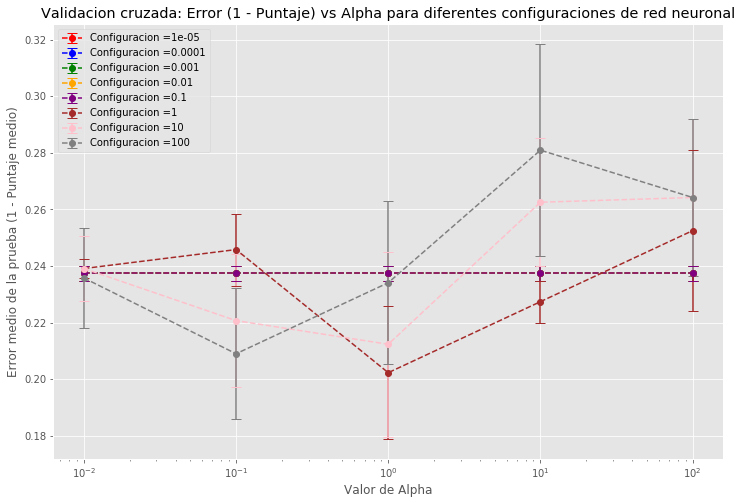

In [39]:
df = cv_results_uniform[cv_results_uniform['param_C'] <= 130]

# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()


In [61]:
with open('modelCV_7.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
cv_results = pd.DataFrame(modelo_cargado.cv_results_)

cv_results.loc[:,columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,10000000,1,0.01,0.765886,0.027765,1
1,10000000,1,0.1,0.698997,0.052432,5
2,10000000,1,1,0.710702,0.031531,4
3,10000000,1,10,0.714047,0.037887,3
4,10000000,1,100,0.735786,0.027883,2


In [62]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,10000000,1,0.01,0.765886,0.027765,1


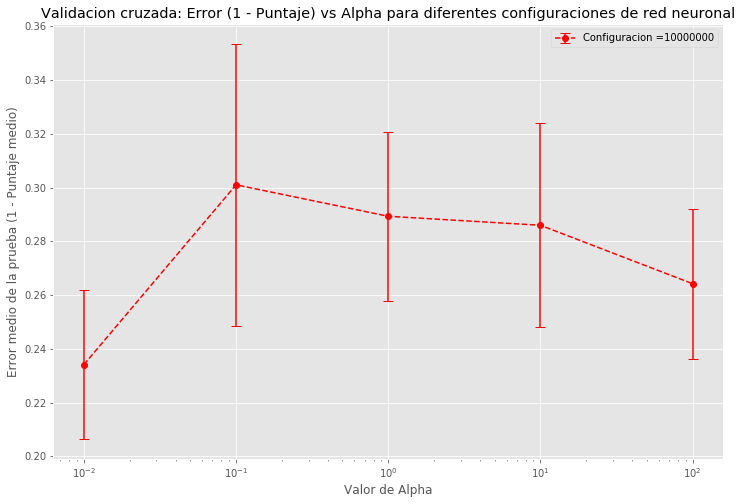

In [65]:
df = cv_results

# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [43]:
best_value=cv_results_best.loc[:, columnas_plot]
best_value_ind2=best_value.index[0]
best_value_ind2

0

In [55]:
with open('modelCV_11.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
cv_results = pd.DataFrame(modelo_cargado.cv_results_)

cv_results.loc[:,columnas_plot]

EOFError: 

In [55]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,10000000,1,0.01,0.765886,0.027765,1


In [56]:
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()


## Verificación de nuestros hiperparámetros

Esto no se haría **JAMÁS** en una situación real.
Pero como este es un ejemplo para aprender, vamos a ver cómo de lejos nos hemos quedado de los hiperparámetros "ideales".

Hacemos un Grid Search utilizando el conjunto de entrenamiento al completo (80% de los datos) y nuestro conjunto de validación va a ser el conjunto de test (20% de los datos).

In [57]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

# probaremos mas iteraciones por recomendacion de los warnings
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_test_5_7 = GridSearchCV(svm,
                       hyperparameters1,
                       cv=ps,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1)  # El warning es normal, pues el ejemplo es demasiado pequeño El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_5_7.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [58]:
with open('modelCV_test_5_7.pkl', 'wb') as f:
    pickle.dump(modelCV_test_5_7, f, protocol=pickle.HIGHEST_PROTOCOL)

In [59]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

# probaremos mas iteraciones por recomendacion de los warnings
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_test_7_10 = GridSearchCV(svm,
                       hyperparameters2,
                       cv=ps,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1)  # El warning es normal, pues el ejemplo es demasiado pequeño El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_7_10.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [10000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [60]:
with open('modelCV_test_7.pkl', 'wb') as f:
    pickle.dump(modelCV_test_7_10, f, protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

# probaremos mas iteraciones por recomendacion de los warnings
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_test_8_10 = GridSearchCV(svm,
                       hyperparameters3,
                       cv=ps,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1)  # El warning es normal, pues el ejemplo es demasiado pequeño El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_8_10.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [100000000, 1000000000, 10000000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [63]:
with open('modelCV_test_8_10.pkl', 'wb') as f:
    pickle.dump(modelCV_test_8_10, f, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
modelCV_test = joblib.load('modelCV_test_5_7.joblib')
test_results = pd.DataFrame(modelCV_test.cv_results_)
test_results.loc[:, columnas_plot].head()

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,0.00001,1,0.01,0.76,0.0,71
1,0.00001,1,0.1,0.76,0.0,71
2,0.00001,1,1,0.76,0.0,71
3,0.00001,1,10,0.76,0.0,71
4,0.00001,1,100,0.76,0.0,71


In [18]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

# probaremos mas iteraciones por recomendacion de los warnings
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_test_11 = GridSearchCV(svm,
                       hyperparameters4,
                       cv=ps,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                       verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_11.fit(dataset_all_X_scaled, dataset_all_Y)


Fitting 1 folds for each of 5 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 195.5min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [100000000000], 'gamma': [0.01, 0.1, 1, 10, 100], 'degree': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [34]:
with open('modelCV_test_11.pkl', 'wb') as f:
    pickle.dump(modelCV_test_11, f, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
with open('modelCV_test_11.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,100000000000,1,0.01,0.780000,0.0,1
1,100000000000,1,0.1,0.706667,0.0,4
2,100000000000,1,1,0.626667,0.0,5
3,100000000000,1,10,0.746667,0.0,3
4,100000000000,1,100,0.753333,0.0,2


In [28]:
test_results = pd.DataFrame(modelCV_test_11.cv_results_)
test_results.loc[:,columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,100000000000,1,0.01,0.780000,0.0,1
1,100000000000,1,0.1,0.706667,0.0,4
2,100000000000,1,1,0.626667,0.0,5
3,100000000000,1,10,0.746667,0.0,3
4,100000000000,1,100,0.753333,0.0,2


In [29]:
cv_results_best = test_results[test_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,100000000000,1,0.01,0.78,0.0,1


In [30]:
test_results.loc[best_value_ind:best_value_ind, columnas_plot]

NameError: name 'best_value_ind' is not defined

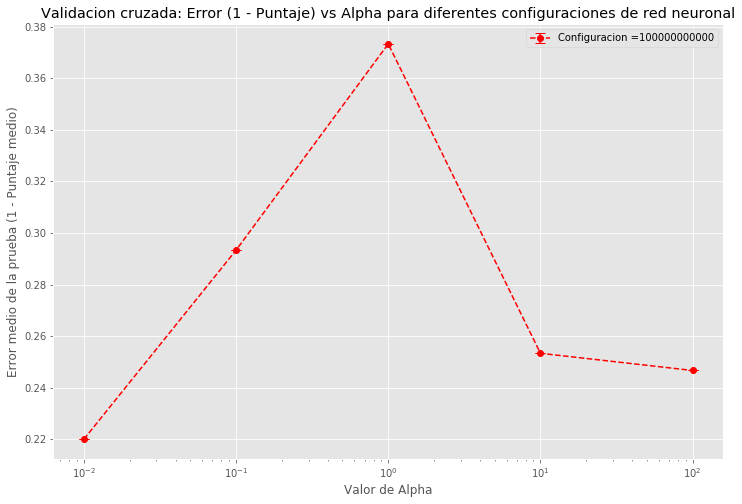

In [42]:
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()


In [50]:
with open('modelCV_test_8_10.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,100000000,1,0.01,0.780000,0.0,2
1,100000000,1,0.1,0.673333,0.0,11
2,100000000,1,1,0.653333,0.0,12
3,100000000,1,10,0.746667,0.0,7
4,100000000,1,100,0.753333,0.0,4
5,1000000000,1,0.01,0.773333,0.0,3
6,1000000000,1,0.1,0.653333,0.0,12
7,1000000000,1,1,0.653333,0.0,12
8,1000000000,1,10,0.746667,0.0,7
9,1000000000,1,100,0.753333,0.0,4


In [51]:
cv_results_best = test_results[test_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
10,10000000000,1,0.01,0.786667,0.0,1


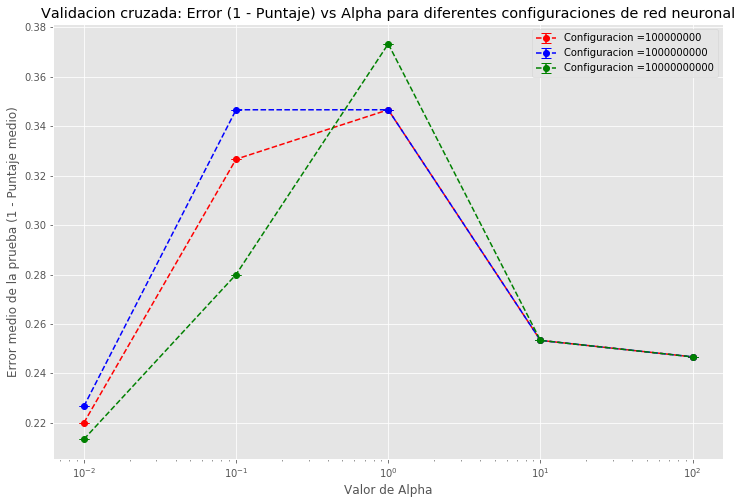

In [52]:
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [48]:
with open('modelCV_test_7.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,10000000,1,0.01,0.773333,0.0,1
1,10000000,1,0.1,0.706667,0.0,4
2,10000000,1,1,0.693333,0.0,5
3,10000000,1,10,0.746667,0.0,3
4,10000000,1,100,0.753333,0.0,2


In [53]:
cv_results_best = test_results[test_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
10,10000000000,1,0.01,0.786667,0.0,1


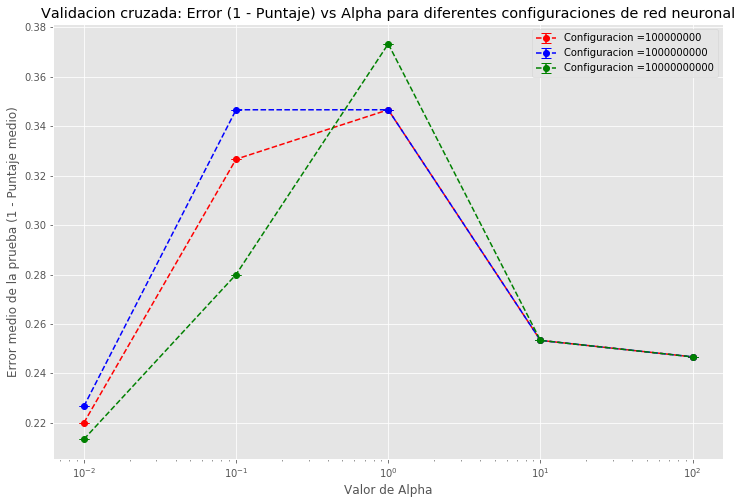

In [54]:
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [55]:
with open('modelCV_test_5_7.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,1e-05,1,0.01,0.760000,0.0,15
1,1e-05,1,0.1,0.760000,0.0,15
2,1e-05,1,1,0.760000,0.0,15
3,1e-05,1,10,0.760000,0.0,15
4,1e-05,1,100,0.760000,0.0,15
5,0.0001,1,0.01,0.760000,0.0,15
6,0.0001,1,0.1,0.760000,0.0,15
7,0.0001,1,1,0.760000,0.0,15
8,0.0001,1,10,0.760000,0.0,15
9,0.0001,1,100,0.760000,0.0,15


In [56]:
cv_results_best = test_results[test_results['rank_test_score'] == 1]
cv_results_best.loc[:, columnas_plot]

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
31,10,1,0.1,0.8,0.0,1


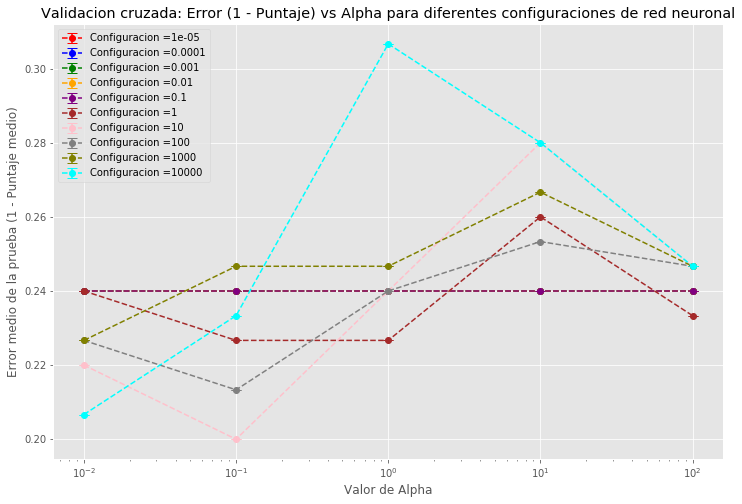

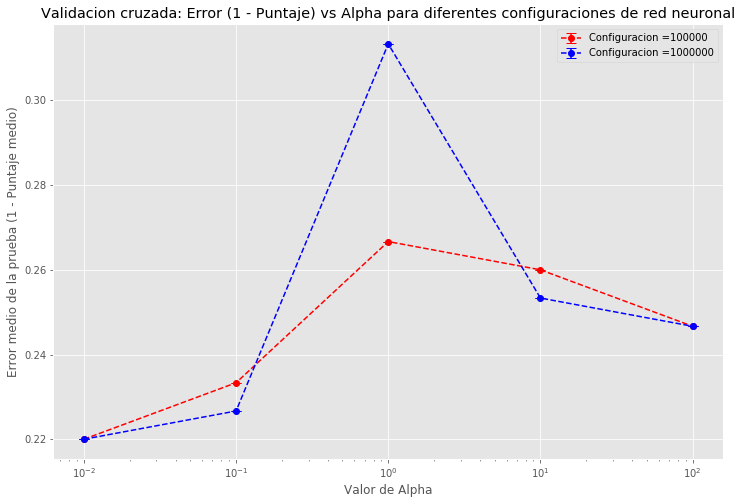

In [57]:
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de Alpha')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [65]:

hyperparameters5 = {
    'kernel': ['poly'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(-6, 1)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1, 2 , 3, 4, 5],
    'gamma': [1]
}

In [66]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_5_7p = GridSearchCV(svm,
                       hyperparameters5,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_5_7p.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 25.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'gamma': [1], 'degree': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [67]:
with open('modelCV_5_7p.pkl', 'wb') as f:
    pickle.dump(modelCV_5_7p, f, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:

hyperparameters6 = {
    'kernel': ['poly'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(1, 3)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1, 2 , 3, 4],
    'gamma': [1]
}

In [17]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_1_2p = GridSearchCV(svm,
                       hyperparameters6,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_1_2p.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  40 | elapsed:  1.4min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:  5.7min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed: 19.4min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 120.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [10, 100], 'gamma': [1], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [19]:
with open('modelCV_1_2p.pkl', 'wb') as f:
    pickle.dump(modelCV_1_2p, f, protocol=pickle.HIGHEST_PROTOCOL)

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
6,100,3,1,0.770903,0.013747,1


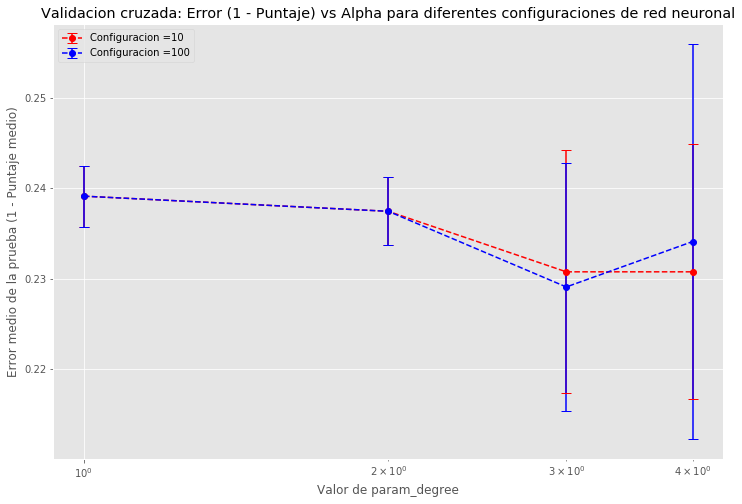

In [54]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_1_2p.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()

In [21]:
hyperparameters7 = {
    'kernel': ['poly'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(3, 5)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2 , 3, 4],
    'gamma': [1]
}

In [22]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_3_4p = GridSearchCV(svm,
                       hyperparameters7,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_3_4p.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  30 | elapsed: 15.3min remaining: 76.3min
[Parallel(n_jobs=-1)]: Done  16 out of  30 | elapsed: 50.4min remaining: 44.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 111.7min remaining: 12.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 625.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [1000, 10000], 'gamma': [1], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [24]:
with open('modelCV_3_4p.pkl', 'wb') as f:
    pickle.dump(modelCV_3_4p, f, protocol=pickle.HIGHEST_PROTOCOL)

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
4,10000,3,1,0.782609,0.040126,1


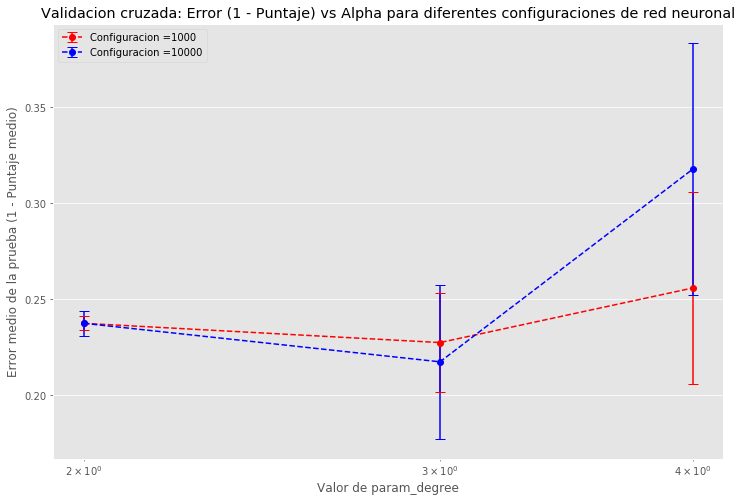

In [53]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_3_4p.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
4,10000,3,1,0.782609,0.040126,1


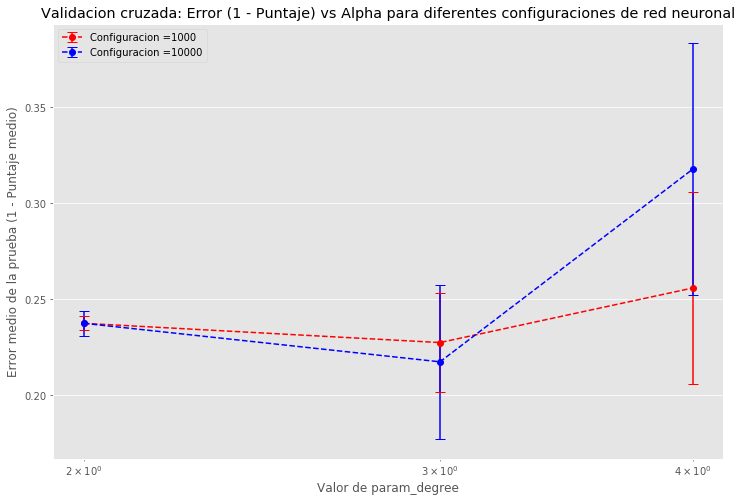

In [52]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_3_4p.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()

In [25]:

hyperparameters8 = {
    'kernel': ['linear'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(-6, 1)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1, 2 , 3, 4, 5],
    'gamma': [1]
}

In [26]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_1_2l = GridSearchCV(svm,
                       hyperparameters8,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_1_2l.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 37.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'gamma': [1], 'degree': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [27]:
with open('modelCV_1_2l.pkl', 'wb') as f:
    pickle.dump(modelCV_1_2l, f, protocol=pickle.HIGHEST_PROTOCOL)

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
32,1,3,1,0.769231,0.01342,1


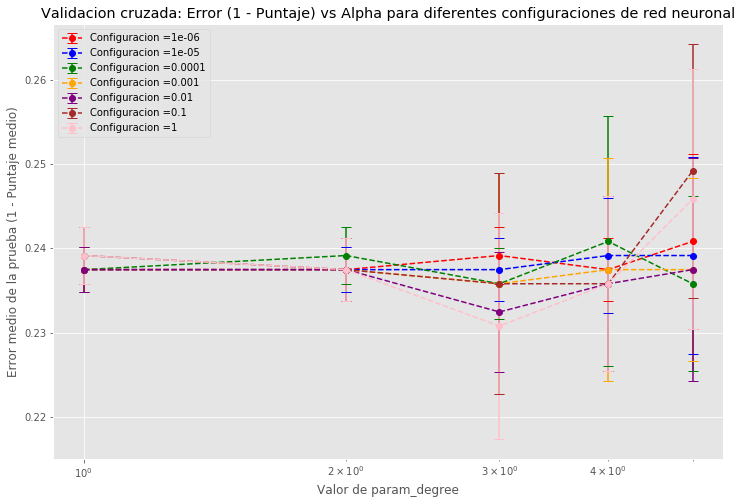

In [51]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_1_2l.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()

In [28]:

hyperparameters9 = {
    'kernel': ['linear'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(1, 3)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [1, 2 , 3, 4],
    'gamma': [1]
}

In [29]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_1_3l = GridSearchCV(svm,
                       hyperparameters9,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_1_3l.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  40 | elapsed:    1.4s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:    3.1s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   25.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [10, 100], 'gamma': [1], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [30]:
with open('modelCV_1_3l.pkl', 'wb') as f:
    pickle.dump(modelCV_1_3l, f, protocol=pickle.HIGHEST_PROTOCOL)

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,10,1,1,0.76087,0.00337,1
1,10,2,1,0.76087,0.00337,1
2,10,3,1,0.76087,0.00337,1
3,10,4,1,0.76087,0.00337,1
4,100,1,1,0.76087,0.00337,1
5,100,2,1,0.76087,0.00337,1
6,100,3,1,0.76087,0.00337,1
7,100,4,1,0.76087,0.00337,1


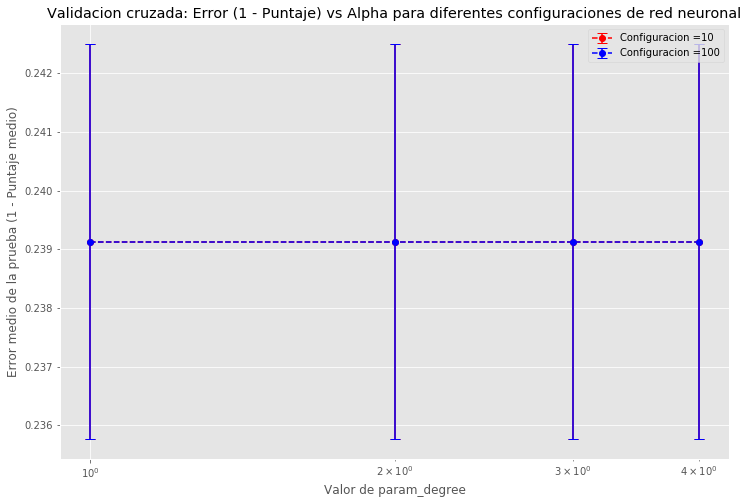

In [50]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_1_3l.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()

In [31]:
hyperparameters10 = {
    'kernel': ['linear'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(3, 5)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2 , 3, 4],
    'gamma': [1]
}

In [32]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_3_5l = GridSearchCV(svm,
                       hyperparameters10,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_3_5l.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  30 | elapsed:  2.9min remaining: 14.5min
[Parallel(n_jobs=-1)]: Done  16 out of  30 | elapsed:  6.8min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  9.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [1000, 10000], 'gamma': [1], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [33]:
with open('modelCV_3_5l.pkl', 'wb') as f:
    pickle.dump(modelCV_3_5l, f, protocol=pickle.HIGHEST_PROTOCOL)

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
0,1000,2,1,0.76087,0.00337,1
1,1000,3,1,0.76087,0.00337,1
2,1000,4,1,0.76087,0.00337,1
3,10000,2,1,0.76087,0.00337,1
4,10000,3,1,0.76087,0.00337,1
5,10000,4,1,0.76087,0.00337,1


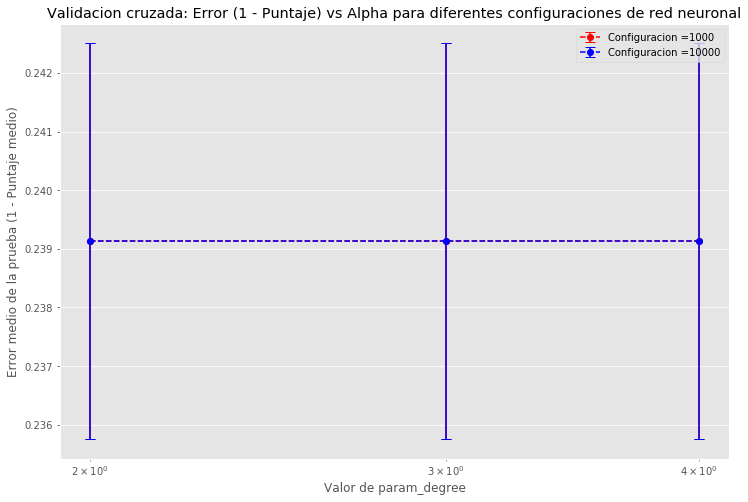

In [49]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_3_5l.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()

In [34]:
hyperparameters11 = {
    'kernel': ['linear'],#['linear', 'poly', 'rbf'],
    'C': [10**i for i in range(5, 8)] , #[0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2 , 3, 4],
    'gamma': [1]
}

In [35]:
# probaremos mas iteraciones por recomendacion de los warnings
svm = SVC(random_state = SEED_VALUE)
modelCV_5_8l = GridSearchCV(svm,
                       hyperparameters11,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True,
                       n_jobs=-1,
                        verbose=3)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_5_8l.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  45 | elapsed: 28.5min remaining: 63.1min
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed: 59.7min remaining: 29.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 93.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [100000, 1000000, 10000000], 'gamma': [1], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [36]:
with open('modelCV_5_8l.pkl', 'wb') as f:
    pickle.dump(modelCV_5_8l, f, protocol=pickle.HIGHEST_PROTOCOL)

,param_C,param_degree,param_gamma,mean_test_score,std_test_score,rank_test_score
3,1000000,2,1,0.767559,0.029548,1
4,1000000,3,1,0.767559,0.029548,1
5,1000000,4,1,0.767559,0.029548,1


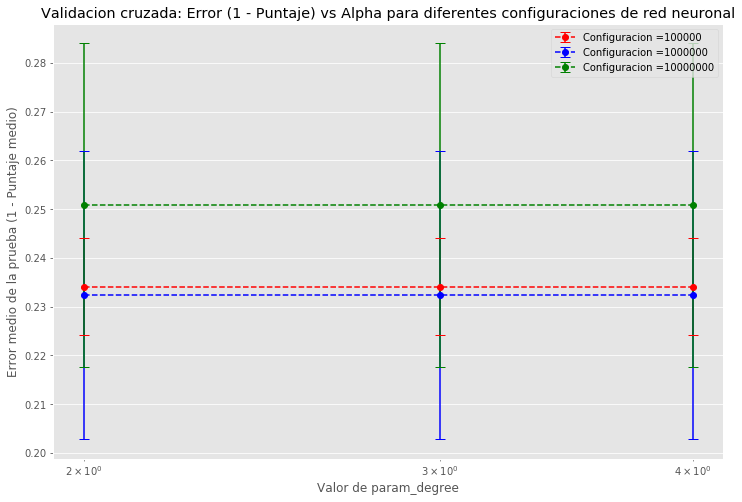

In [48]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']
with open('modelCV_5_8l.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)
test_results = pd.DataFrame(modelo_cargado.cv_results_)
test_results.loc[:,columnas_plot]
cv_results_best = test_results[test_results['rank_test_score'] == 1]

display(cv_results_best.loc[:, columnas_plot])
df = test_results
# Asumiendo que quieres mostrar solo un cierto número de configuraciones de red neuronal por gráfica
num_configuraciones_por_grafica = 10

# Dividir las configuraciones de la red neuronal en grupos
unique_configs = df['param_C'].unique()
config_groups = [unique_configs[i:i + num_configuraciones_por_grafica] for i in range(0, len(unique_configs), num_configuraciones_por_grafica)]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for group in config_groups:
    plt.figure(figsize=(12, 8))
    for index , config in enumerate(group):
        # Asignar un color de la paleta a cada configuración
        color = colores[index]
        df_config = df[df['param_C'] == config]
        plt.errorbar(df_config['param_degree'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'],
                     fmt='o--', ecolor=color, capsize=5, label='Configuracion ={}'.format(config),color=color)
    plt.title('Validacion cruzada: Error (1 - Puntaje) vs Alpha para diferentes configuraciones de red neuronal')
    plt.xlabel('Valor de param_degree')
    plt.ylabel('Error medio de la prueba (1 - Puntaje medio)')
    plt.xscale('log')
    plt.legend()
    plt.show()


In [40]:
columnas_plot=['param_C','param_degree','param_gamma','mean_test_score', 'std_test_score', 'rank_test_score']

# Get unique values for param_C, param_gamma, and param_degree
unique_C = cv_results['param_C'].unique()
#unique_gamma = cv_results['param_gamma'].unique()
unique_degree = cv_results['param_degree'].unique()

# Create combinations of param_C, param_gamma, and param_degree
combinations = list(itertools.product(unique_C, unique_degree))

# Group the combinations
config_groups = [combinations[i:i + num_configuraciones_por_grafica] 
                 for i in range(0, len(combinations), num_configuraciones_por_grafica)]

# Number of rows and columns for the subplots
n_rows = len(config_groups)
n_cols = 1  # One column with multiple rows
print(n_rows)
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8 * n_rows))

if n_rows == 1:  # If there is only one row, convert axes to a list
    axes = [axes]

for idx, group in enumerate(config_groups):
    ax = axes[idx]
    for config in group:
        # Filter data based on the current combination
        df_config = cv_results[(cv_results['param_C'] == config[0]) & 
                               (cv_results['param_degree'] == config[1])]
        ax.errorbar(df_config['param_gamma'], 1 - df_config['mean_test_score'], yerr=df_config['std_test_score'], 
                    fmt='o-', ecolor='red', capsize=5, label='C: {}, Degree: {}'.format(config[0],config[1]))
    ax.set_title('Cross Validation: Error (1 - Score) vs C for different configurations')
    ax.set_xlabel('Value of C')
    ax.set_ylabel('Mean Test Error (1 - Mean Score)')
    ax.set_xscale('log')
    ax.legend()

plt.tight_layout()
plt.show()

NameError: name 'cv_results' is not defined